In [3]:
import h5py
import psana
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import  rotate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize
import multiprocessing
import os
from functools import partial
import time
import sys
import argparse
from datetime import datetime
import tempfile
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization


## Viewing Static XES Spectra

Processing: 100%|██████████| 5/5 [00:01<00:00,  4.36Shot_Batch/s]


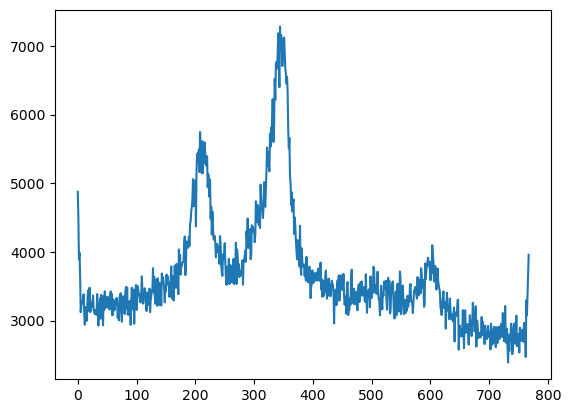

In [10]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1015522',lcls_run=22)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
xes.key_epix=['epix_2/ROI_0_area']
#xes.set_key_aliases(keys,names)
#xes.import_roi=[[0,-1]]
#xes.rois=[[0,-1]]
xes.adu_cutoff=3.0
xes.angle=0
xes.transpose=True
xes.pixels_to_patch=[382,383,384,385]#needed to change since detector is 90 degrees from standard. e.g. transposed above
xes.patch_mode='polynomial'
xes.run_parser(['77'])
start=time.time()
xes.primary_analysis_parallel_range(4,xes_experiment,method=xes.primary_analysis_static,increment=2000,verbose=False)
end=time.time()
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_ROI_1')
plt.plot(v.summed_xes)

(380.0, 400.0)

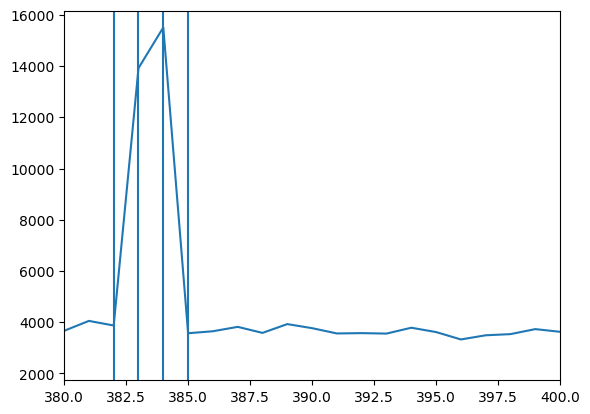

In [8]:
plt.plot(v.summed_xes)
plt.axvline(382)
plt.axvline(383)
plt.axvline(384)
plt.axvline(385)
plt.xlim(380,400)

In [4]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1027922',lcls_run=22)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
keys=['tt/ttCorr','epics/lxt', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL'] 
names=['time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl']
#Here we define the epix detector keys separately as they are imported separately to avoid OOM
xes.key_epix=[r'epix_2/ROI_0_area']
xes.friendly_name_epix=['epix']
##
xes.set_key_aliases(keys,names)
#xes.end_index=5000
xes.mintime=-0.9
xes.maxtime=0.9
xes.numpoints=40
xes.time_bins=np.linspace(xes.mintime,xes.maxtime,xes.numpoints)
xes.rois=[[0,50]]
xes.adu_cutoff=3.0
xes.angle=90
xes.lxt_key=None
xes.transpose=True
#xes.add_filter('xray','ipm4',1.0E3)
#xes.add_filter('simultaneous','ipm4',1.0E3)
xes.add_filter('simultaneous','time_tool_ampl',0.05)
xes.run_parser(['44-46'])

In [5]:
start=time.time()
xes.primary_analysis_parallel_range(8,xes_experiment,increment=1000,verbose=False)
end=time.time()

Processing: 100%|██████████| 30/30 [02:25<00:00,  4.85s/Shot_Batch]


In [6]:
xes.status

['Setting key aliases.',
 'Adding filter: Shot Type=simultaneous, Filter Key=time_tool_ampl, Threshold=0.05',
 'Parsing run array.',
 'Starting parallel analysis with shot ranges.',
 'Parsing run shots.',
 'Run shots parsed.',
 'Breaking into shot ranges with increment 1000.',
 'Shot ranges broken.',
 'Parallel analysis with shot ranges completed.',
 'Parallel analysis completed.',
 'Total time: 145.59 seconds.',
 'Parallel time (processing): 145.59 seconds.',
 'Time per batch (on average): 4.85 seconds.',
 'Time per core (on average): 18.20 seconds.',
 'Batches per core (on average): 3.75.',
 'Read bytes: 13.14 MB.',
 'Write bytes: 4055.88 MB.',
 'Memory used: 52.87 MB.']

(-0.8, 0.8)

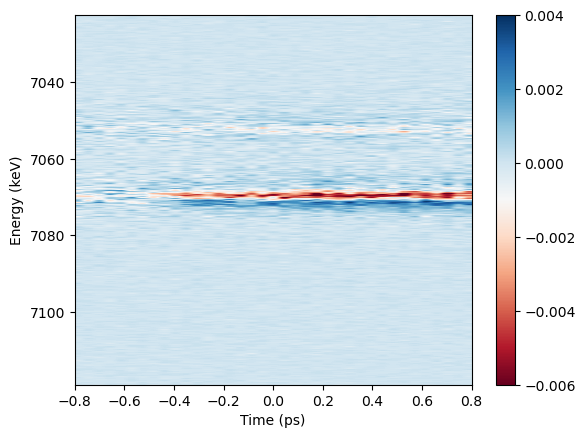

In [7]:
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_spectra(xes_analysis=xes,xes_key='epix_xray_not_laser_time_binned_ROI_1',xes_laser_key='epix_simultaneous_laser_time_binned_ROI_1')
v.vmin=-0.006
v.vmax=0.004
v.plot_2d_difference_spectrum(xes)
plt.xlim(-0.8,0.8)